# LAB 2
NAME:Abraham James Raja R
REG NO:21MIA1108

#Lab Task 1
Setup and Basic Extraction

In [1]:

!apt-get install ffmpeg
!pip install ffmpeg-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


#Task2
Extract Frame Information

In [3]:
import ffmpeg

input_video = 'IV.mp4'
probe = ffmpeg.probe(input_video)
video_stream = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')

frame_info = {
    'width': video_stream['width'],
    'height': video_stream['height'],
    'duration': float(video_stream['duration']),
    'nb_frames': int(video_stream['nb_frames'])
}

print(frame_info)

{'width': 1280, 'height': 720, 'duration': 16.754333, 'nb_frames': 496}


Count number of I P B frames

In [6]:
import ffmpeg
import subprocess
import json

def get_frame_counts(video):
    cmd = [
        'ffprobe', '-v', 'error', '-select_streams', 'v:0',
        '-show_entries', 'frame=pict_type', '-of', 'json', video
    ]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    frames_info = json.loads(result.stdout)
    frame_counts = {'I': 0, 'P': 0, 'B': 0}
    for frame in frames_info['frames']:
        frame_type = frame['pict_type']
        if frame_type in frame_counts:
            frame_counts[frame_type] += 1

    return frame_counts

input_video = 'IV.mp4'
frame_counts = get_frame_counts(input_video)
print(frame_counts)

{'I': 17, 'P': 479, 'B': 0}


Percentage of each frame type in video

In [7]:
total_frames = sum(frame_counts.values())
percentages = {frame_type: (count / total_frames) * 100 for frame_type, count in frame_counts.items()}
print(percentages)

{'I': 3.4274193548387095, 'P': 96.57258064516128, 'B': 0.0}


Analyze Frame Distribution

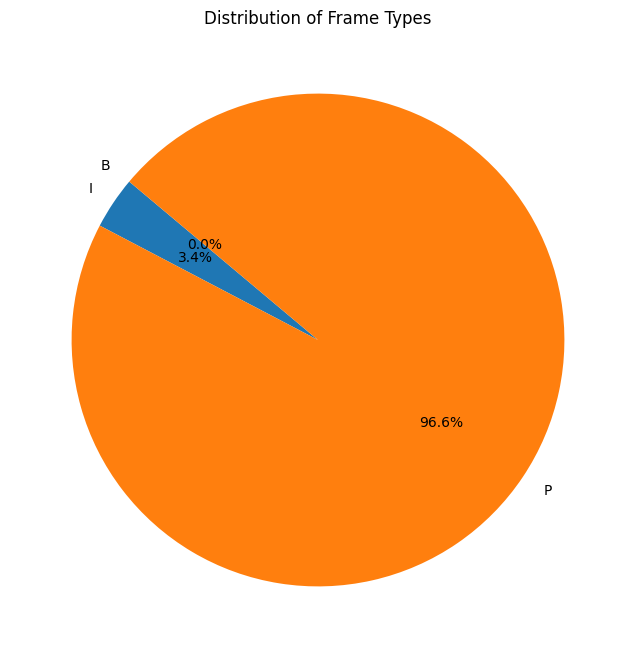

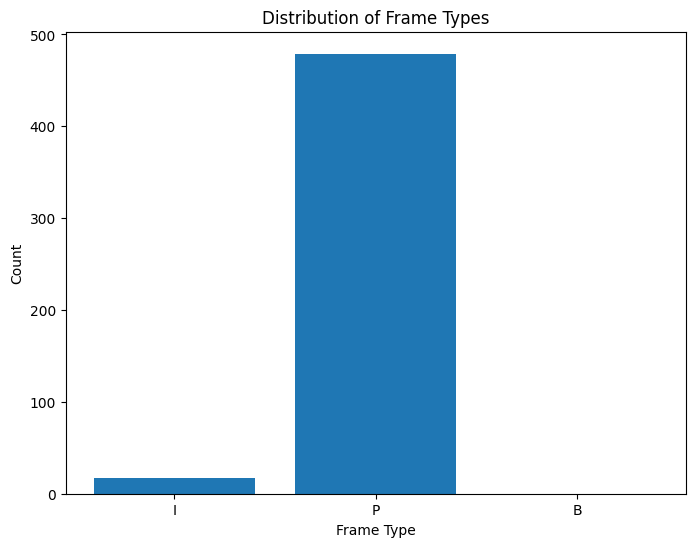

In [8]:
import matplotlib.pyplot as plt

labels = frame_counts.keys()
sizes = frame_counts.values()
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Frame Types')
plt.show()
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes)
plt.title('Distribution of Frame Types')
plt.xlabel('Frame Type')
plt.ylabel('Count')
plt.show()

#TASK3

Extract Frames

In [10]:
# Extract I frames
!ffmpeg -i IV.mp4 -vf "select=eq(pict_type\,I)" -vsync vfr I_frame_%04d.png

# Extract P frames
!ffmpeg -i IV.mp4 -vf "select=eq(pict_type\,P)" -vsync vfr P_frame_%04d.png

# Extract B frames
!ffmpeg -i IV.mp4 -vf "select=eq(pict_type\,B)" -vsync vfr B_frame_%04d.png

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Visualizing the frames

I frames:


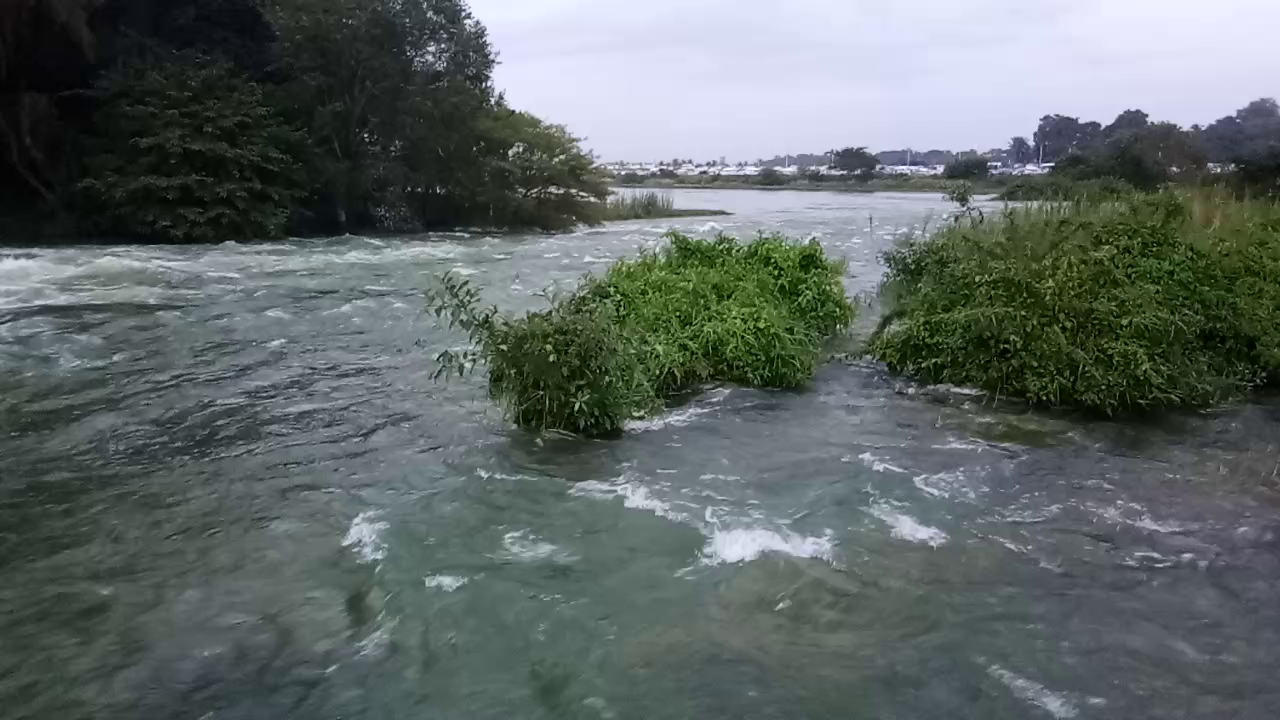

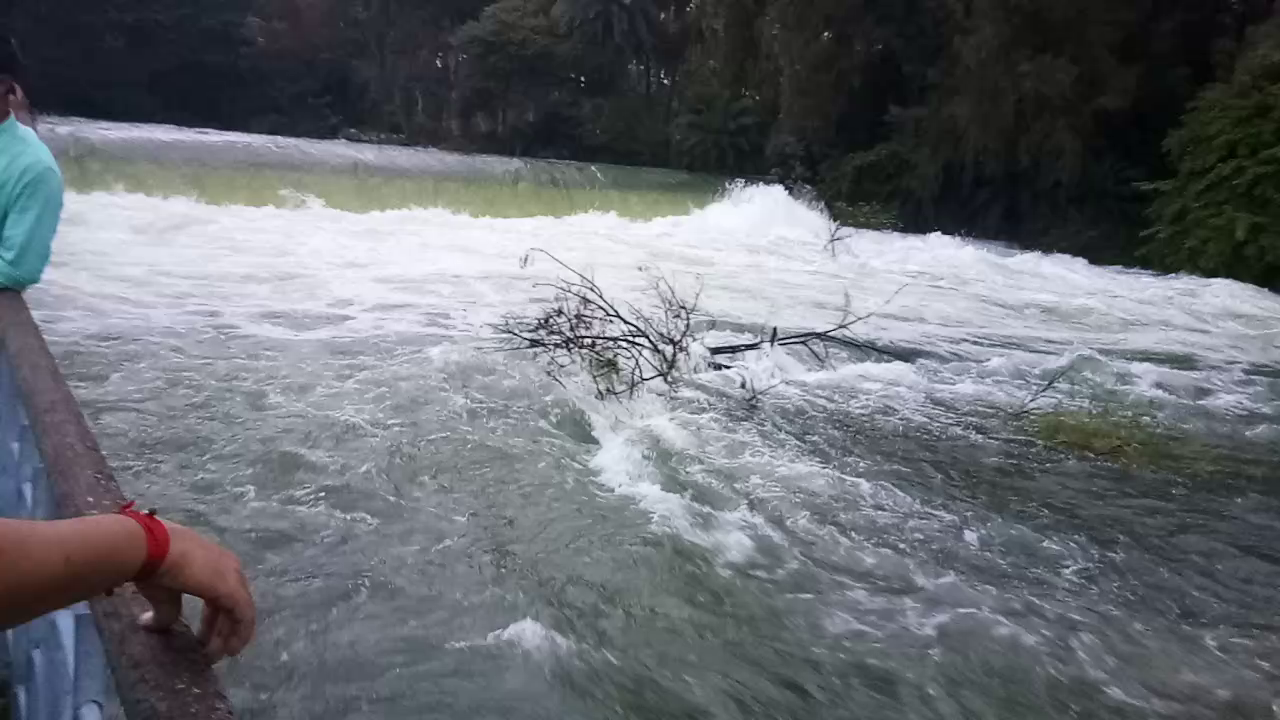

P frames:


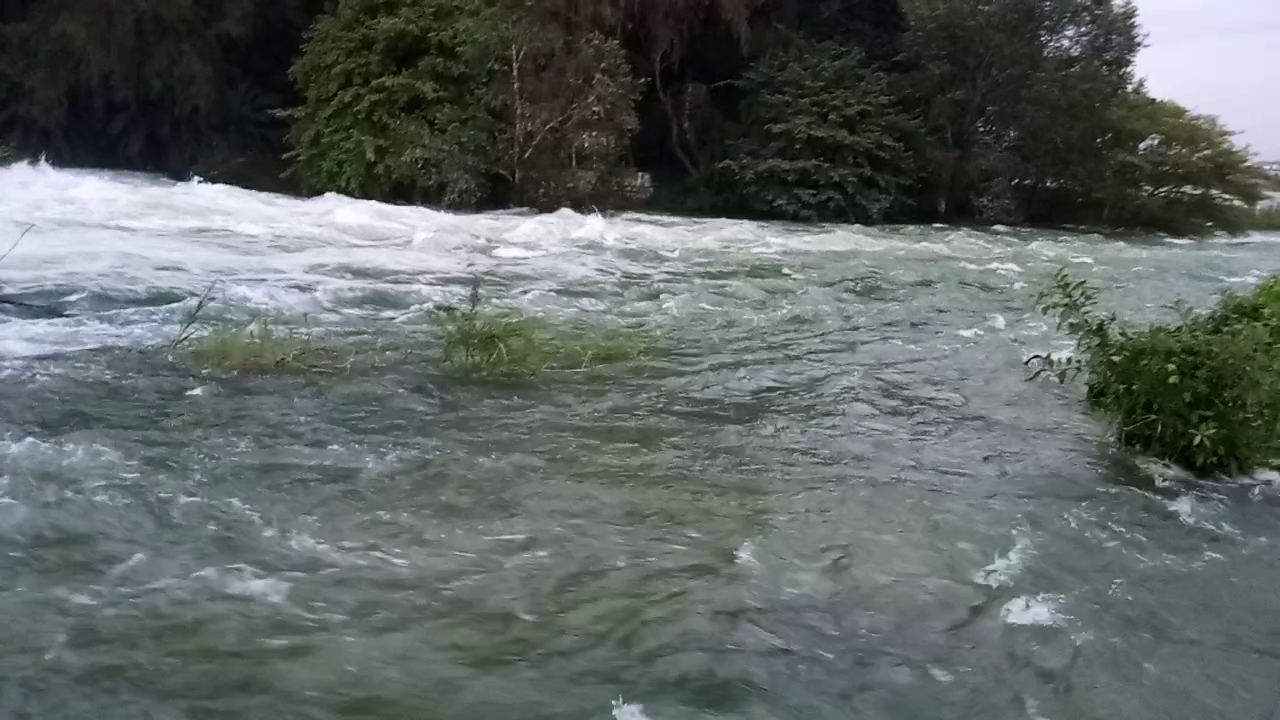

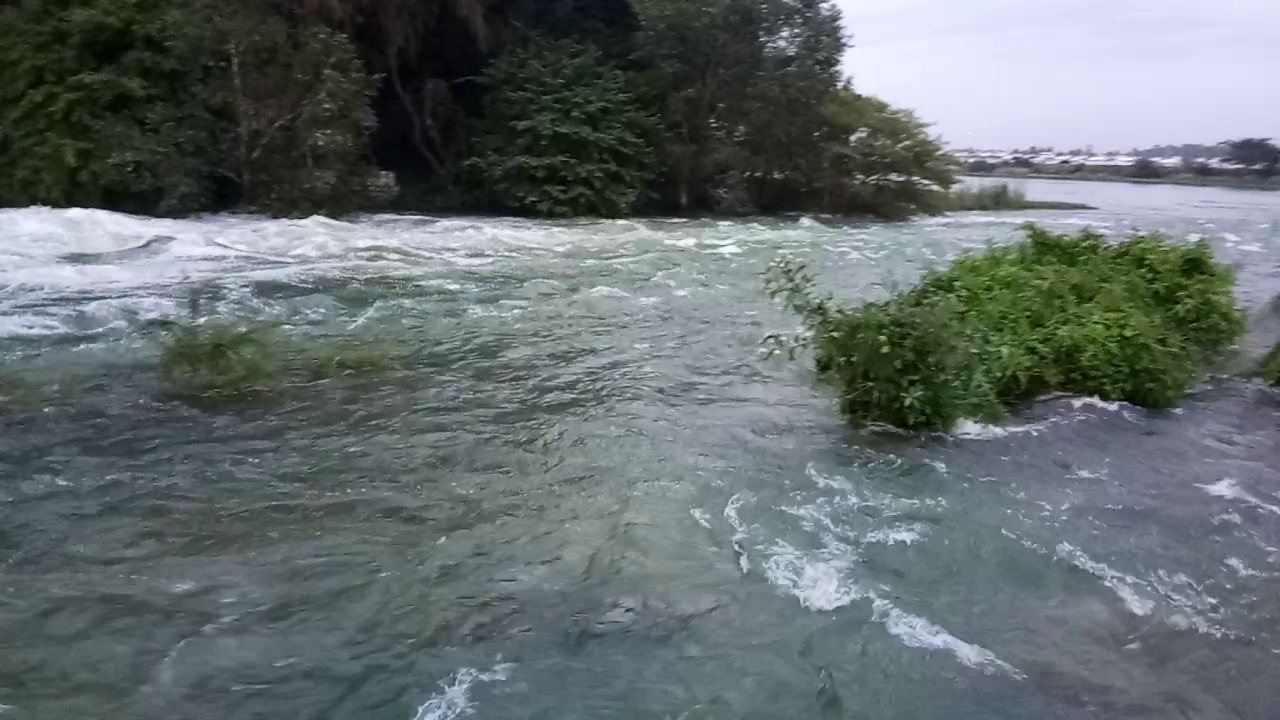

B frames:


In [11]:
from PIL import Image
import glob
from IPython.display import display

def display_frames(pattern, max_frames=2):
    frames = glob.glob(pattern)
    for frame in frames[:max_frames]:
        img = Image.open(frame)
        display(img)
print("I frames:")
display_frames('I_frame_*.png')
print("P frames:")
display_frames('P_frame_*.png')
print("B frames:")
display_frames('B_frame_*.png')

Comparing I frames:


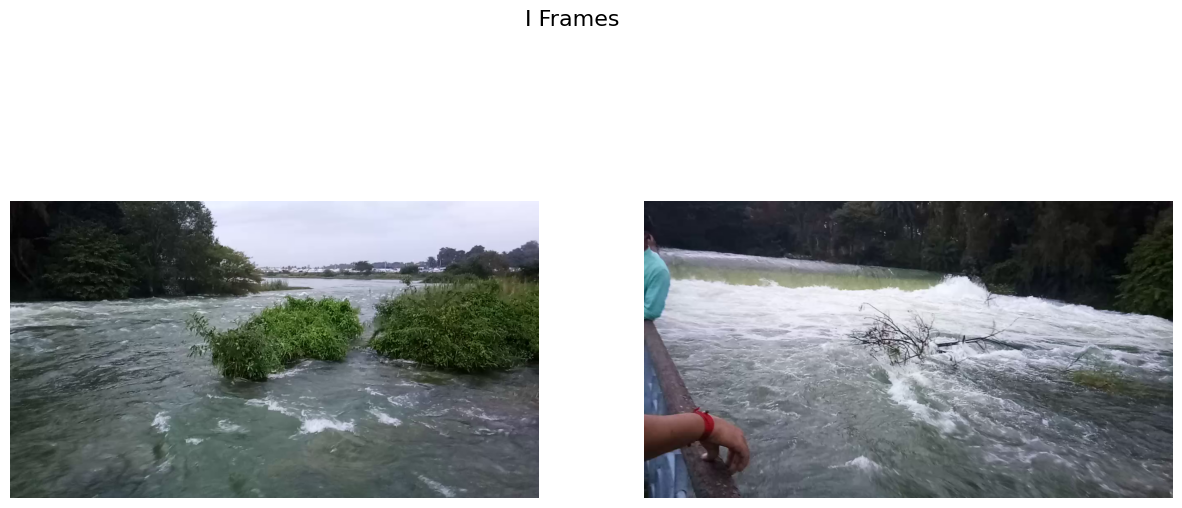

Comparing P frames:


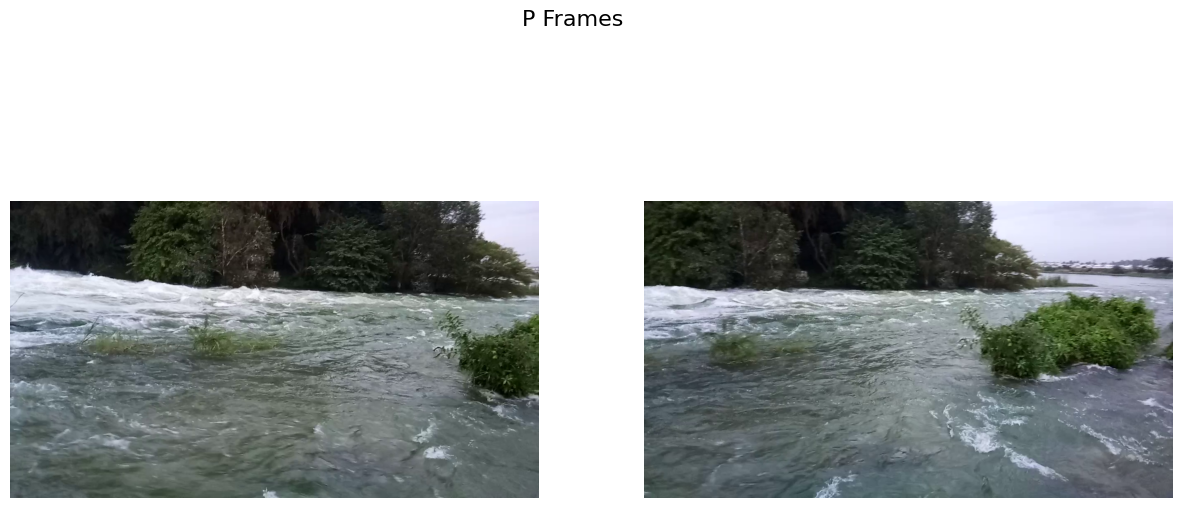

No B frames found.


In [21]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

def load_frames(pattern, max_frames=1):
    frames = glob.glob(pattern)
    loaded_frames = []
    for frame in frames[:max_frames]:
        img = Image.open(frame)
        loaded_frames.append(img)
    return loaded_frames

def display_side_by_side(frames, title):
    if not frames:
        print("No frames to display.")
        return

    fig, axes = plt.subplots(1, len(frames), figsize=(15, 7))
    if len(frames) == 1:  # Ensure axes is iterable even if there's only one frame
        axes = [axes]

    fig.suptitle(title, fontsize=16)
    for ax, img in zip(axes, frames):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Load frames
i_frames = load_frames('I_frame_*.png', max_frames=2)
p_frames = load_frames('P_frame_*.png', max_frames=2)
b_frames = load_frames('B_frame_*.png', max_frames=2)

# Display frames
if i_frames:
    print("Comparing I frames:")
    display_side_by_side(i_frames, "I Frames")
else:
    print("No I frames found.")

if p_frames:
    print("Comparing P frames:")
    display_side_by_side(p_frames, "P Frames")
else:
    print("No P frames found.")

if b_frames:
    print("Comparing B frames:")
    display_side_by_side(b_frames, "B Frames")
else:
    print("No B frames found.")


#TASK 4
Frame Compression Analysis

Calculate the file sizes of the extracted frames.

In [16]:
import os
import glob

def calculate_average_size(pattern):
    frames = glob.glob(pattern)
    total_size = 0
    for frame in frames:
        total_size += os.path.getsize(frame)
    average_size = total_size / len(frames) if frames else 0
    return average_size, len(frames)
i_frame_avg_size, i_frame_count = calculate_average_size('I_frame_*.png')
p_frame_avg_size, p_frame_count = calculate_average_size('P_frame_*.png')
b_frame_avg_size, b_frame_count = calculate_average_size('B_frame_*.png')

print(f"I frames: Average size = {i_frame_avg_size} bytes, Count = {i_frame_count}")
print(f"P frames: Average size = {p_frame_avg_size} bytes, Count = {p_frame_count}")
print(f"B frames: Average size = {b_frame_avg_size} bytes, Count = {b_frame_count}")


I frames: Average size = 999120.0 bytes, Count = 17
P frames: Average size = 1100677.8058455114 bytes, Count = 479
B frames: Average size = 0 bytes, Count = 0


Step 2: Compare the Average File Sizes

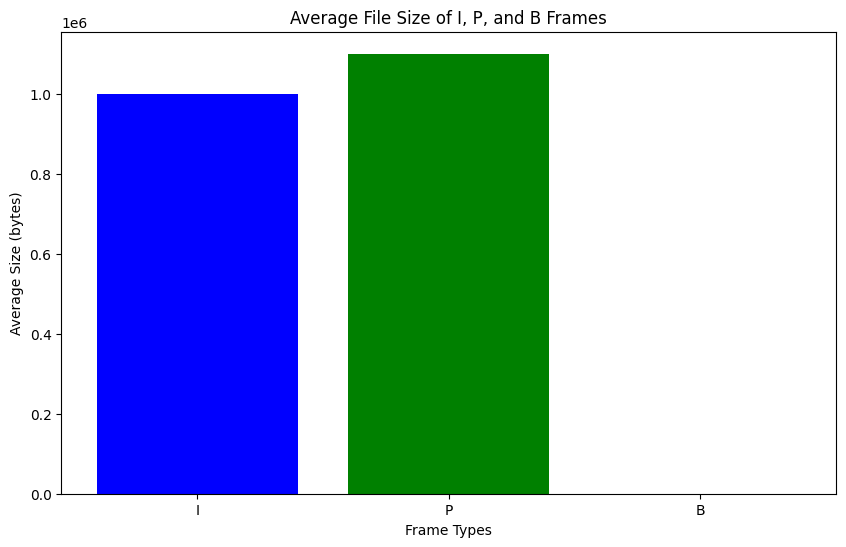

In [17]:
import matplotlib.pyplot as plt
frame_types = ['I', 'P', 'B']
average_sizes = [i_frame_avg_size, p_frame_avg_size, b_frame_avg_size]

plt.figure(figsize=(10, 6))
plt.bar(frame_types, average_sizes, color=['blue', 'green', 'red'])
plt.xlabel('Frame Types')
plt.ylabel('Average Size (bytes)')
plt.title('Average File Size of I, P, and B Frames')
plt.show()


#TASK 5
Extract and Save I Frames

In [18]:
!ffmpeg -i IV.mp4 -vf "select=eq(pict_type\,I)" -vsync vfr I_frame_%04d.png

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Reconstruct the video

In [19]:
import subprocess
import os

def extract_i_frames(video_path, output_dir):
    try:
        os.makedirs(output_dir, exist_ok=True)
        cmd = [
            'ffmpeg',
            '-i', video_path,
            '-vf', 'select=eq(pict_type\\,I)',
            '-vsync', 'vfr',
            f'{output_dir}/frame_%04d.png'
        ]
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"I-frames extracted successfully to {output_dir}")

    except Exception as e:
        print(f"Error extracting I-frames: {str(e)}")
video_path = 'IV.mp4'
i_frames_dir = 'I_frames'

extract_i_frames(video_path, i_frames_dir)


def reconstruct_video_from_i_frames(i_frames_dir, output_video_path, frame_rate=1):
    try:
        cmd = [
            'ffmpeg',
            '-framerate', str(frame_rate),
            '-i', os.path.join(i_frames_dir, 'frame_%04d.png'),
            '-c:v', 'libx264',
            '-pix_fmt', 'yuv420p',
            output_video_path
        ]
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        print(f"Video reconstructed successfully and saved to {output_video_path}")

    except Exception as e:
        print(f"Error reconstructing video: {str(e)}")
output_video_path = 'reconstruct_video.mp4'
reconstruct_video_from_i_frames(i_frames_dir, output_video_path,frame_rate=1)

I-frames extracted successfully to I_frames
Video reconstructed successfully and saved to reconstruct_video.mp4


In [20]:
from IPython.display import Video
Video('reconstruct_video.mp4', embed=True)